# Lecture 11: Text-to-Speech Synthesis I

TTS Synthesis is based on the same four subquestions as Speech Recognition.

We still need a latent symbol space ($Q_{1}$) (whether it is phones, diphones, characters, character embeddings, words/phrases). We have a text input, and we would need a method to so to the latent symbol space ($Q_{3}$). Then we also need to generate acoustics from the latent symbol space ($Q_{2}$). $Q_{4}$ is embedded in the $Q_{2}$ process.

The future is a closed-loop system, meaning that the output affects the TTS system, and it will affect the input. But for now, systems are open-loop.

The first uses of the TTS systems were announcement systems. Although, right now, the natural progressions and advancements are natural dialogs, and assisting impaired persons (visually and/or speech).

The challenges are fast adaptation to new speaker (voice, pitch, style), multilngual speech synthesis, and affective speech synthesis (ie. showing emotions through words, through tones and through speech in general) and have a well-based objective evaluation. 

- Von Kempelen's Speaking Machine
- Dudley's Voder

- ## Current TTS Systems

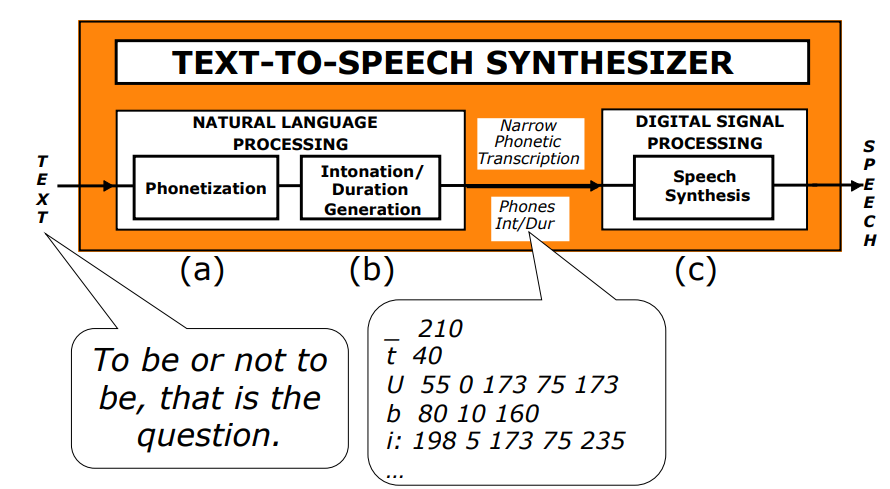

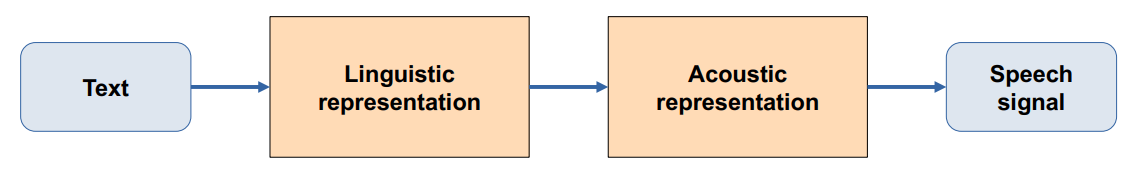

### Linguistic Representation:

Everything had to start with NLP (Natural Language Processing), to analyze text, to be able to decide the llinguistic representation, in order to move forward with the acoustic representation. 

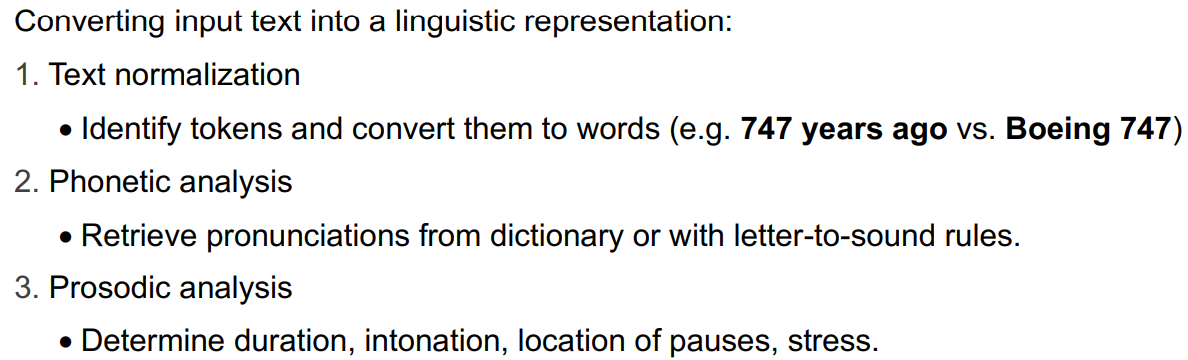

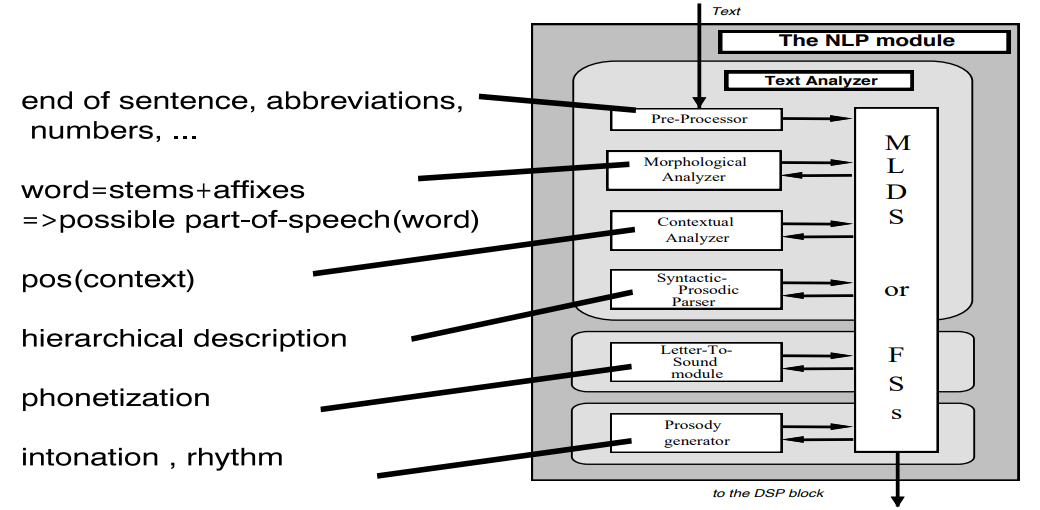

And it all had to go through preprocessing: 

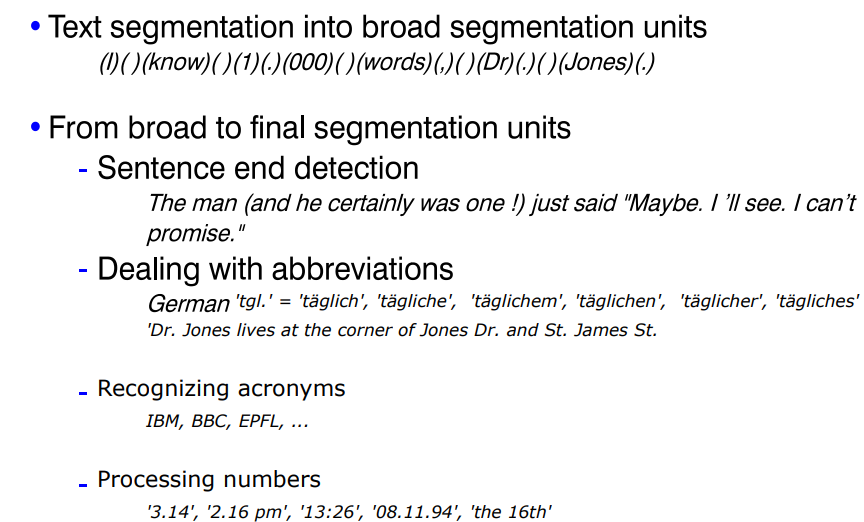

Then Morphological Analysis: 

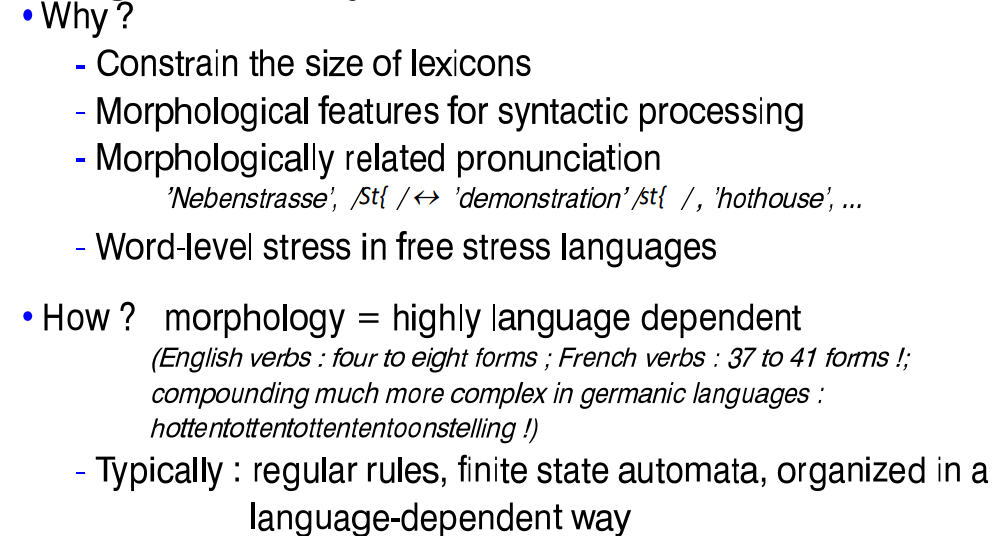

Then Contextual Analysis: 

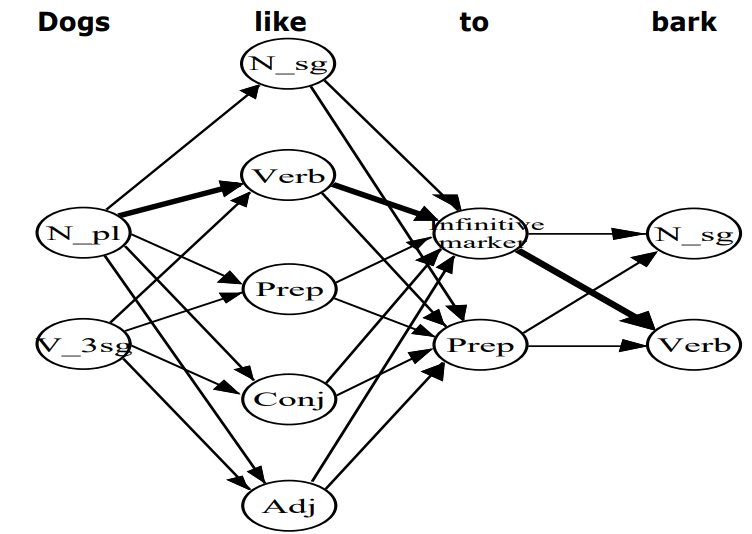

Then Syntactic Prosodic Parsing: 

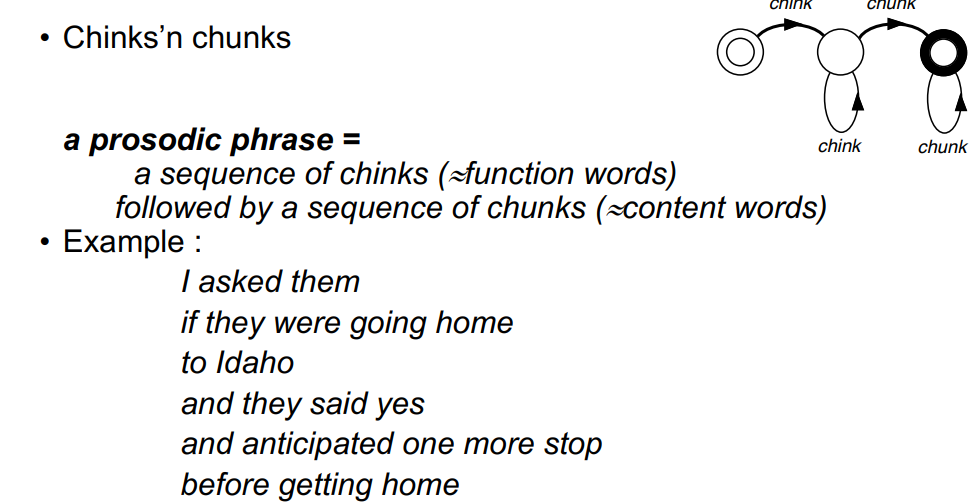

Then we move from text to phones: 

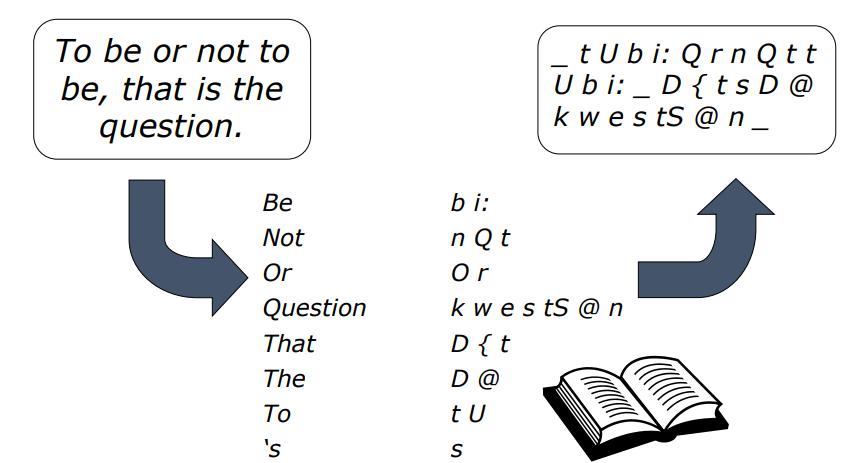

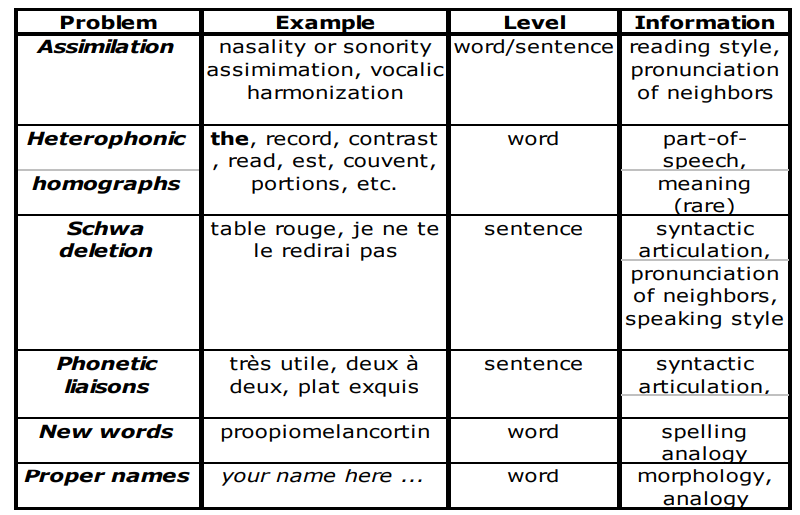

Then we convert letters to sounds:

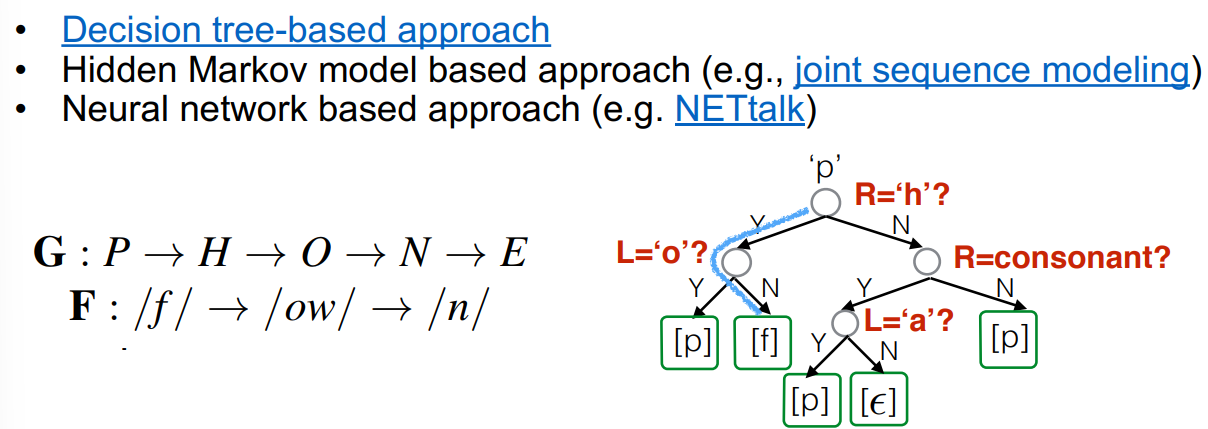

We generate prosodies: (text to tones)

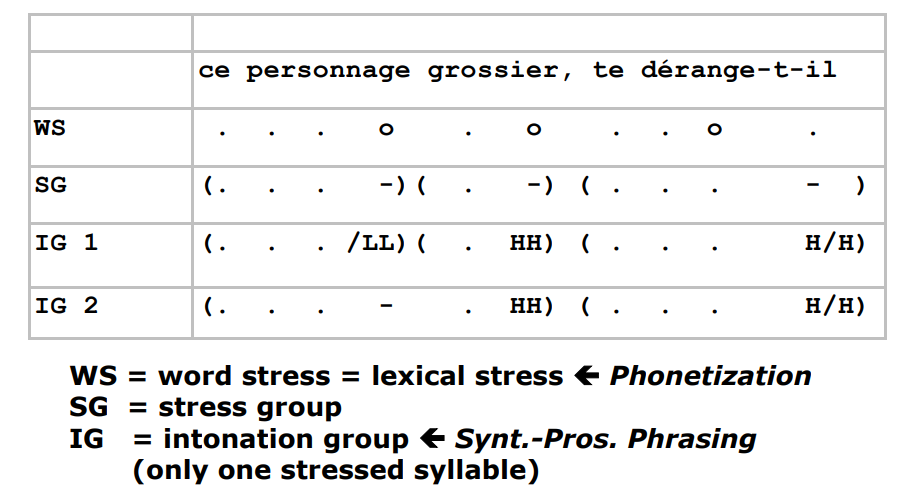

Tones to $F_{0}$:

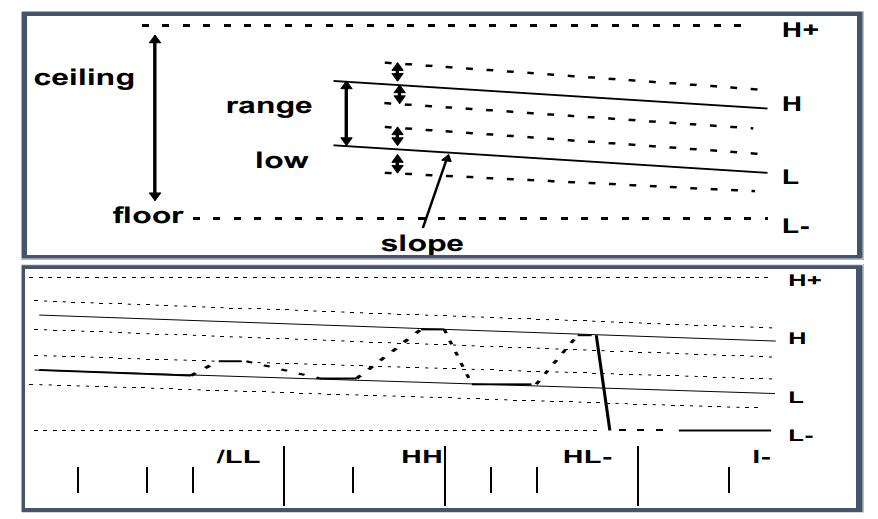

Decide the phonemes' durations:

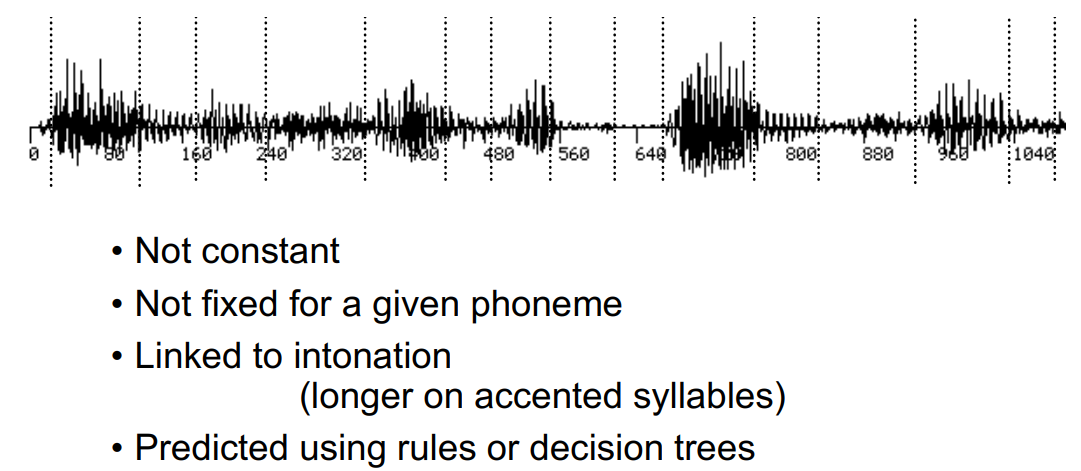

### Acoustic Representation:

We now need to generate speech. 

We have two main voice source types:

- Glottal source (quasi-periodic)
- Constrictive noise source (stochastic)

And these are equivalent to the class of phonemes (ie. Class of phonemes $ \leftrightarrow $ type of source)

- Only glottal source: vowels and semi-vowels
- Noise source: consonants
    
    types of constriction:
    + fricatives 
    + plosives
    + approximants


Up to this points, we cannot construct an articulatory speech synthesis, a fully functional one, as the understanding of it is still not complete. Fully Emulating the human speech production process is still hard. A few systems have been developed, whether mechanical or digital, and they practically work well, but still they are not working 100%.


### Formant speech synthesis

![Screenshot 2026-01-28 191153.png](<attachment:Screenshot 2026-01-28 191153.png>)

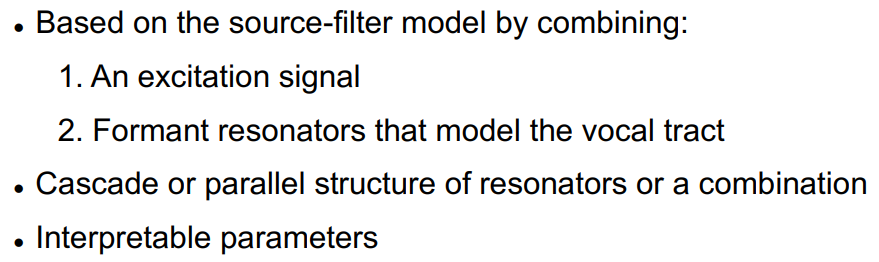

Then came LPC synthesizers: 

These are completely based on linear prediction to predict the coefficients. 

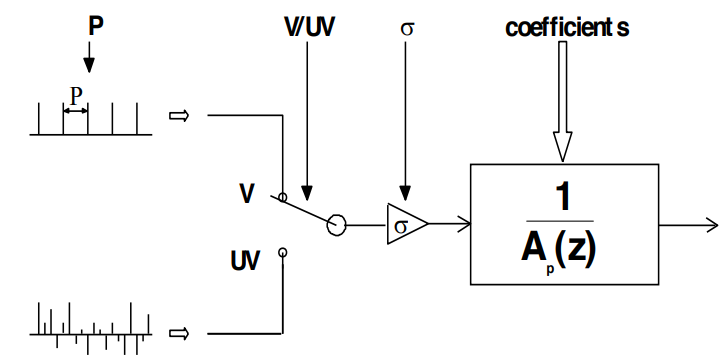

Then came the idea of concatenative synthesis, which was complex if we are operating on the phone level, it does not work, segmenting the speech signal into phones is very complex, especially since phones are not independant. 

Concatenative synthesis: 

If we chunk up sounds (aka. phones) it does not work, because connecting the phones causes a problem, it was never a fully phone ending then another one fully starting. This is why they came up with diphones. The steady states are easy to patch (the actual phone), but the transitions are where the problems are, and are hard to patch, hard to predict, and much hard to patch and to emulate. Where comes the diphons idea, it is not the phone where we are interested, but rather the transition between different phones. In total we would need $N^{2}$ diphones, where N is the total number of phones, to fully cover all diphones and all phone transitions. We can easily record diphones and use HMMs to align them and label them, to be able to use concatenative speech synthesis using diphones to form utterances. We can then adjust prosody for naturalness. 

We need some signal processing methods to perform concatenative TTS, we perform pitch-synchronous concatenation (epoch detection) to avoid artefacts when joining different segments.

#### Pitch-Synchronous Overlap and Add (PSOLA)

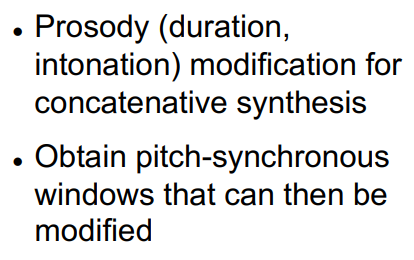

They recorded diphones, but with different people, so they get as many instances as possible. Then for each utterance, they select the best sequence of units through the Viterbi beam search. All for the instance to fit the best in the context (tone, pitch, length, etc...) (Automatic Unit Selection) For this we have two costs we need to optimize, the target cost (measuring how well a unit fits the context in terms of phonetic context, $F_{0}$, stress, phrase position, duration and acoustic distance) and a join cost (measuring how well two units can be concatenated, matching formants, energy, $F_{0}$, to be smooth and natural).

So we basically get target costs for every single instance, and for every instance for an utterance and every instance for the next utterance, we compute the join (concatenation) cost, and so on for the next utterances until the word is done, until we get to the silence. And we compute the lowest cost score, and take the best path. (Actually we take the best few instances for each utterance, which is why we use Viterbi's beam search, and then compute the best paths, and take the best one).
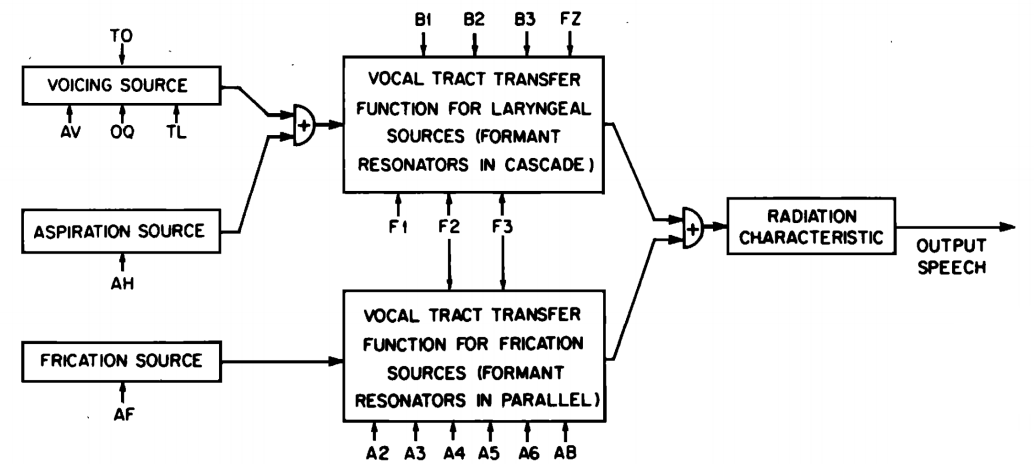